(1) Download and read the data.  For Python, you may usepandaslibrary and useread csvfunction

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("Smarket2.csv")

(2) Print the data.  How does the data look like?  (For Python, you may usehead()function inpandaslibrary)

In [2]:
print(data.head())

   Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  \
0           1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959   
1           2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032   
2           3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623   
3           4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614   
4           5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213   

  Direction  
0        Up  
1        Up  
2      Down  
3        Up  
4        Up  


(3) Print the shape of the data. Shape means the dimensions of the data. (In Python,pandasdataframeinstances have a variableshape)

In [3]:
print("Shape: ", data.shape)

Shape:  (1250, 10)


(4) Extract the features and the label from the data.  The features we are interested in areLag1andLag2and the label isDirection.

In [4]:
extracted = data[["Lag1", "Lag2", "Direction"]]
print(extracted.head())

    Lag1   Lag2 Direction
0  0.381 -0.192        Up
1  0.959  0.381        Up
2  1.032  0.959      Down
3 -0.623  1.032        Up
4  0.614 -0.623        Up


(5) Split the data into a train/test split.  (In Python, you can usetrain test splitfromsklearnlibrary.)

In [5]:
X = data[["Lag1", "Lag2"]]
y = data[["Direction"]]
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

       Lag1   Lag2
0     0.381 -0.192
1     0.959  0.381
2     1.032  0.959
3    -0.623  1.032
4     0.614 -0.623
...     ...    ...
1245  0.422  0.252
1246  0.043  0.422
1247 -0.955  0.043
1248  0.130 -0.955
1249 -0.298  0.130

[1250 rows x 2 columns]
     Direction
0           Up
1           Up
2         Down
3           Up
4           Up
...        ...
1245        Up
1246      Down
1247        Up
1248      Down
1249      Down

[1250 rows x 1 columns]


(6) Apply k-NN to the data.  (In Python, you can use theKNeighborsClassifierfunction fromsklearnlibrary.)

In [6]:
scores = []
for k in range(1,11):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train.values.ravel())
    y_pred = classifier.predict(X_test)
    scores.append(classifier.score(X_test, y_test))
    print("Accuracy at K =", k, ": ", classifier.score(X_test, y_test))

Accuracy at K = 1 :  0.52
Accuracy at K = 2 :  0.516
Accuracy at K = 3 :  0.536
Accuracy at K = 4 :  0.524
Accuracy at K = 5 :  0.504
Accuracy at K = 6 :  0.468
Accuracy at K = 7 :  0.464
Accuracy at K = 8 :  0.488
Accuracy at K = 9 :  0.464
Accuracy at K = 10 :  0.496


(7) Plot the accuracy of your implementation fork∈1,2,3,4,5,6,7,8,9,10.

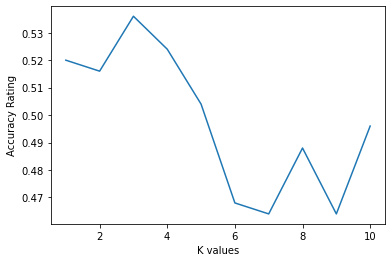

In [7]:
plt.plot([1,2,3,4,5,6,7,8,9,10], scores)
plt.xlabel("K values")
plt.ylabel("Accuracy Rating")
plt.show()